In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from numpy import linalg as LA

## Buggy PCA

In [69]:
def BuggyPCA(x_D, dim):
    
    u, s, vh = LA.svd(x_D)
    
    x_recon = u[:,:dim] @ np.diag(s[:dim]) @ vh[:dim,:]
    
    x_d = x_D @ vh[:dim,:].T
    
    return x_d, x_recon, s

In [70]:
df = pd.read_csv('hw5.info/data/data2D.csv', header = None)
X_D = np.array(df)
d=1
X_d, X_recon, sigval = BuggyPCA(X_D, d)
# X_recon

In [71]:
# RECONSTRUCTION ERROR
# Reconstruction error is jsut Frobenius norm here
Error = np.sum(np.square(X_D-X_recon))/len(X_D)
print('Reconstruction Error = ', Error)

Reconstruction Error =  0.8869030837347941


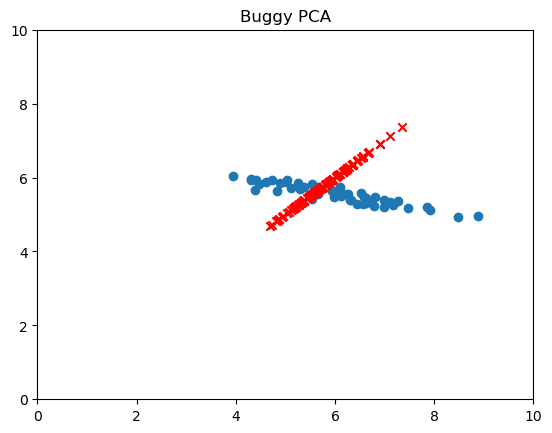

In [72]:
x1 = np.split(X_D, 2, axis=1)[0]
x2 = np.split(X_D, 2, axis=1)[1]
xr1 = np.split(X_recon, 2, axis=1)
xr2 = np.split(X_recon, 2, axis=1)
plt.scatter(x1,x2, marker = 'o')
plt.scatter(xr1, xr2, c= 'red',marker = 'x')
plt.axis([0,10,0,10])
plt.title('Buggy PCA')
plt.savefig('BuggyPCA.pdf')

## Demeaned PCA

In [73]:
def DemeanedPCA(x_D, dim):
    
    xMean = np.mean(x_D, axis=0)
    
    x_D_Demeaned = (x_D - xMean)
    
    u, s, vh = LA.svd(x_D_Demeaned)

    z = np.dot(x_D_Demeaned, vh[0:dim].T)
    
    x_recon = np.dot(z.reshape(x_D.shape[0], dim), vh[0:dim].reshape(dim,x_D.shape[1])) + xMean
    
    
    x_d = x_D @ vh[:dim,:].T
    
    return x_d, x_recon, s

In [74]:
df = pd.read_csv('hw5.info/data/data2D.csv', header = None)
X_D = np.array(df)
d=1
X_D_demeaned, X_recon, singval = DemeanedPCA(X_D, d)

In [75]:
# RECONSTRUCTION ERROR
# Reconstruction error is jsut Frobenius norm here
Error = np.sum(np.square(X_D-X_recon))/len(X_D)
print('Reconstruction Error = ', Error)

Reconstruction Error =  0.010006085628512906


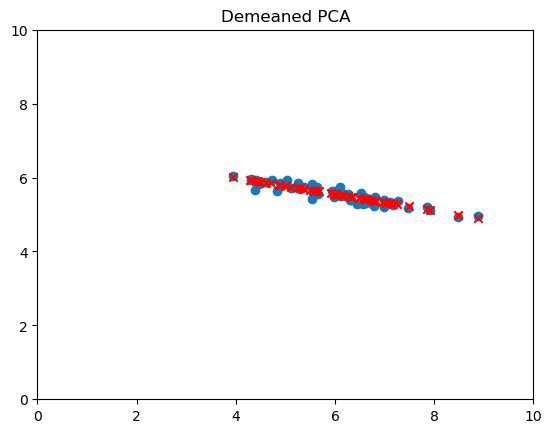

In [76]:
x1 = np.split(X_D, 2, axis=1)[0]
x2 = np.split(X_D, 2, axis=1)[1]
xr1 = np.split(X_recon, 2, axis=1)[0] 
xr2 = np.split(X_recon, 2, axis=1)[1]
plt.scatter(x1,x2, marker = 'o')
plt.scatter(xr1, xr2, c= 'red',marker = 'x')
plt.axis([0,10,0,10])
plt.title('Demeaned PCA')
plt.savefig("DemeanedPCA.pdf")

## Normalized PCA

In [86]:
def NormalizedPCA(x_D, dim):
    

    xMean = np.mean(x_D, axis=0)
    
    xSTD = np.std(x_D, axis=0)

    x_D_NormDemeaned = (x_D - xMean)/xSTD
    
    u, s, vh = LA.svd(x_D_NormDemeaned)
    
    x_recon = (( u[:,:dim] @ np.diag(s[:dim]) @ vh[:dim,:] )*xSTD) + x_D.mean(axis=0)
    
    x_d = x_D_NormDemeaned
    
    return x_d, x_recon, s

In [87]:
df = pd.read_csv('hw5.info/data/data2D.csv', header = None)
X_D = np.array(df)
d=1
X_d, X_recon, singval = NormalizedPCA(X_D, d)

In [88]:
Error = np.sum(np.square(X_D-X_recon))/len(X_D)
print('Reconstruction Error = ', Error)

Reconstruction Error =  0.04947208345477071


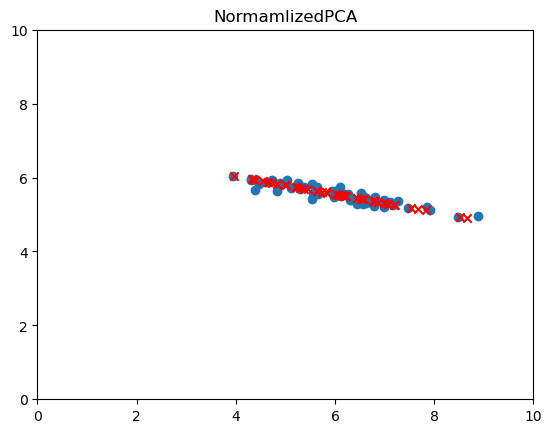

In [89]:
x1 = np.split(X_D, 2, axis=1)[0]
x2 = np.split(X_D, 2, axis=1)[1]
xr1 = np.split(X_NormDemeaned_recon, 2, axis=1)[0] 
xr2 = np.split(X_NormDemeaned_recon, 2, axis=1)[1]
plt.scatter(x1,x2, marker = 'o')
plt.scatter(xr1, xr2, c= 'red',marker = 'x')
plt.axis([0,10,0,10])
plt.title('NormamlizedPCA')
plt.savefig("NormalizedPCA.pdf")

## DRO

In [90]:
def DRO(x_D, dim):
    b = np.mean(X_D, axis=1)
    

    x_D_demeaned = x_D - x_D.mean(axis=0)
    
    covariance = np.cov(x_D_demeaned.T)
    
    evals, evecs = LA.eig(covariance)
    
    z = np.dot(x_D_demeaned, evecs[:,:dim])

    x_recon = np.dot(z, evecs[:,:dim].T) + x_D.mean(axis=0)
    
    x_d = x_D_demeaned
    
    return x_recon

In [91]:
df = pd.read_csv('hw5.info/data/data2D.csv', header = None)
X_D = np.array(df)
d=1
X_recon = DRO(X_D, d)
# X_recon

In [92]:
# RECONSTRUCTION ERROR
# Reconstruction error is jsut Frobenius norm here
Error = np.sum(np.square(X_D-X_recon))/len(X_D)
print('Reconstruction Error = ', Error)

Reconstruction Error =  0.010006085628512905


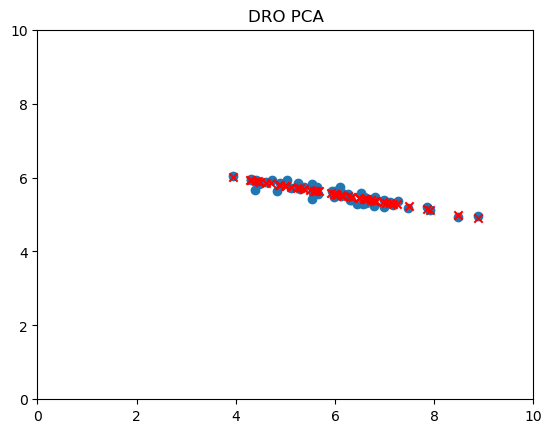

In [93]:
x1 = np.split(X_D, 2, axis=1)[0]
x2 = np.split(X_D, 2, axis=1)[1]
xr1 = np.split(X_recon, 2, axis=1)[0] 
xr2 = np.split(X_recon, 2, axis=1)[1]
plt.scatter(x1,x2, marker = 'o')
plt.scatter(xr1, xr2, c= 'red',marker = 'x')
plt.axis([0,10,0,10])
plt.title('DRO PCA')
plt.savefig("DRO_PCA.pdf")

In [94]:
df1000 = pd.read_csv('hw5.info/data/data1000D.csv', header = None)
X_D = np.array(df1000)
errors = []
for d in range(1,50):
    X_recon = DRO(X_D, d)
#     Error = LA.norm(X_D - X_recon)**2
    Error = np.sum(np.square(X_D-X_recon))/len(X_D)
    errors.append(Error.real)

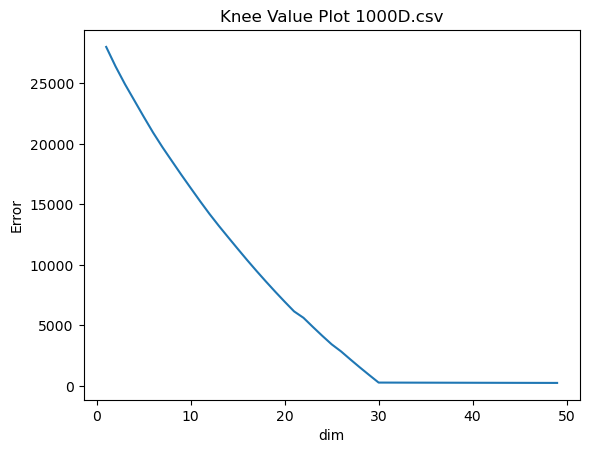

In [95]:
plt.plot(range(1,50),errors)
plt.title('Knee Value Plot 1000D.csv')
plt.ylabel('Error')
plt.xlabel('dim')
plt.savefig('1000D_DRO_KneeValue.pdf')

## DRLV

In [266]:
# Run KMeans to get initial parameters for means, covariances, and mixing coefficients
# which are the fraction of points belonging to each cluster k
# Then run EM algorithm
def EM(Means, Covariances, MixingCoeff, Data):
    # np.array Means, np.array Covariance, np.array MixingCoeff, np.array Data
    # Means,
    
    # E-step is calculate the posterior probabilities gamma(z_{nk})
    Gammas = []
    
    for i in range(len(Means)):
        Precision = LA.inv(Covariances[i])
        Det = LA.det(Covariances[i])
        for x in Data:
            MixingCoeff[i]*Gaussian(x, Means[i], Precision, Det)
    
    
    
#     for x in Data:
#         for i in range(len(Means)):
#             MixingCoeff[i]*Gaussian[x, Means[i], Covariances[i], LA.pin]

    # M-step
    

In [ ]:
def Gaussian(x, mu, precision, det):
    return np.exp(  -0.5*( np.transpose(x-mu) ) @ Precision @ (x-mu)   )  /( np.sqrt((2*np.pi)**len(mu)) )
                                /( np.sqrt(det) ) 
